In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

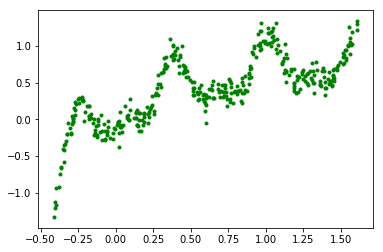

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
sortindx = np.argsort(x)
x = x[sortindx]
y = y[sortindx]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
xy = np.c_[x,y]
plt.scatter(x, y, marker='.', color='g')

In [3]:
#backup
def reverse0(self:tsp.Spline1D, y):
    x = np.zeros_like(self.input)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x += xpossible*self.rangeX[i]
    return x

## Reconstructing X

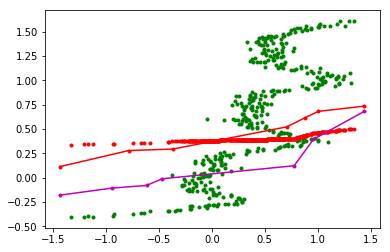

In [10]:
max_points = 7
lr=0.1
espline = tsp.Spline1D(max_points, x, y)
dspline = tsp.Spline1D(max_points, x, y)
max_points = 7
espline.n_max = max_points
dspline.n_max = max_points


h = espline.forward(x)
x_ = dspline.forward(h)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, x_, marker='.', color='r')
plt.plot(espline.X, espline.Y, marker='.', color='m')
plt.plot(dspline.X, dspline.Y, marker='.', color='r')

In [11]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

bx = x
by = y
x = by
y = bx

for step in range(100000):
    h = espline.forward(x)# + x
    x_ = dspline.forward(h)# + h
    dx_ = x_- x
    dh = dspline.backward(dx_)# + dx_
    dx = espline.backward(dh)# + dh

#     h = espline.forward(x) + x
#     x_ = dspline.forward(h) + h
#     dx_ = x_- x
#     dh = dspline.backward(dx_) + dx_
#     dx = espline.backward(dh) + dh
    
    espline.update(lr)
    dspline.update(lr)
    
    if step % 1000 == 0:
        espline._maintain_good_spline_()
        dspline._maintain_good_spline_()
        
    if step % 100 == 0:
        error = (dx_**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
#         epsilon=0.4
#         plt.xlim(x.min()-epsilon, x.max()+epsilon)
#         plt.ylim(y.min()-epsilon, y.max()+epsilon)
        plt.scatter(x, x_, marker='*', color='lime')
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(espline.X, espline.Y, marker='.', color='m')
        plt.plot(dspline.X, dspline.Y, marker='.', color='r')
        plt.scatter(x, x_, marker='.', color='r')
        
        
#         plt.scatter(x, dy, marker='.', color='blue')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00000025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.8432093458893541


_______________________
Steps 100
Error 0.0001118662072239336


_______________________
Steps 200
Error 5.5153909069561305e-05


_______________________
Steps 300
Error 1.643888087079357e-05


_______________________
Steps 400
Error 7.321190994809933e-06


_______________________
Steps 500
Error 4.815617134300257e-06


_______________________
Steps 600
Error 3.961657779372185e-06


_______________________
Steps 700
Error 3.5081485315896305e-06


_______________________
Steps 800
Error 3.1873017353397915e-06


_______________________
Steps 900
Error 2.9247324289486054e-06


_______________________
Steps 1000
Error 2.695388065591307e-06


_______________________
Steps 1100
Error 6.123377470932615e-06


_______________________
Steps 1200
Error 1.2856672795903102e-06


_______________________
Steps 1300
Error 2.745150471767568e-07


_______________________
Steps 1400
Error 6.196348308781111e-08


fitted to our expectation


TclError: can't invoke "update" command: application has been destroyed

In [ ]:
%matplotlib inline
plt.scatter(x, x_, marker='*', color='lime')
plt.scatter(x, y, marker='.', color='g')
plt.plot(espline.X, espline.Y, marker='.', color='m')
plt.plot(dspline.X, dspline.Y, marker='.', color='r')
plt.scatter(x, x_, marker='.', color='r')